In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmo as pg

In [2]:
def plot_non_dominated_fronts(points, marker="o", comp=[0, 1], axes=None, color = 'k'):
    """
    Plots the nondominated fronts of a set of points. Makes use of :class:`~pygmo.fast_non_dominated_sorting` to
    compute the non dominated fronts.

    Args:
        points (2d array-like): points to plot
        marker (str): matplotlib marker used to plot the *points*
        comp (list): Components to be considered in the two dimensional plot (useful in many-objectives cases)
        axes: plot axes (if :data:`None`, new axes will be created)

    Returns:
        the input *axes* or a new axes instance

    Examples:
        >>> from pygmo import *
        >>> prob = problem(zdt())
        >>> pop = population(prob, 40)
        >>> ax = plot_non_dominated_fronts(pop.get_f()) # doctest: +SKIP
    """

    from matplotlib import pyplot as plt
    from pygmo import fast_non_dominated_sorting, population
    from numpy import linspace

    # We plot
    fronts, _, _, _ = fast_non_dominated_sorting(points)

    # We define the colors of the fronts (grayscale from black to white)
    cl = list(
        zip(
            linspace(0.1, 0.9, len(fronts)),
            linspace(0.1, 0.9, len(fronts)),
            linspace(0.1, 0.9, len(fronts)),
        )
    )

    if axes is None:
        axes = plt.axes()

    for ndr, front in enumerate(fronts):
        c = list(cl[ndr])
        if color == 'k':
            pass
        elif color == 'r':
            c[0] = 1
        elif color == 'g':
            c[1] = 1
    # We plot the points
        for idx in front:
                axes.plot(
                points[idx][comp[0]], points[idx][comp[1]], marker=marker, color=c
            )
        # We plot the fronts
        # Frist compute the points coordinates
        x = [points[idx][comp[0]] for idx in front]
        y = [points[idx][comp[1]] for idx in front]
        # Then sort them by the first objective
        tmp = [(a, b) for a, b in zip(x, y)]
        tmp = sorted(tmp, key=lambda k: k[0])
        # Now plot using step
        axes.step([c[0] for c in tmp], [c[1] for c in tmp], color=c, where="post")

    return axes

In [2]:
import os
os.chdir('/mmfs1/gscratch/cheme/dalba/repos/ECFERS')

In [3]:
inputs_df = pd.read_csv('data/inputs.csv')
inputs_df.columns = ['sample','objective','time','dilution_factor','C00058','C00004','C00037','C00149','C00022','C00065','C00036','C00002','C00020','C00010','C00033','C00158HCT','C00011','C00024','p_hEC11719', 'p_hEC11137','p_hEC6411','p_hEC43117']
inputs_df['time'] = inputs_df['time'].apply(lambda x: (x*60+15)*60)
inputs_df.sort_values(['objective','time','sample'], inplace=True)

data_df = pd.read_csv('data/data.csv').set_index('sample').reindex(inputs_df['sample']).reset_index()
data_stds = pd.read_csv('data/data_stds.csv').set_index('sample').reindex(inputs_df['sample']).reset_index()
data_df.columns = ['sample','C00149','C00022','C00065','C00037','C00004','C00010','C00024','C00042','C00122','C00158','C00002','C00048','C00041','C00049','C00047','C00183','C00109','C02630']
data_stds.columns = ['sample','C00149','C00022','C00065','C00037','C00004','C00010','C00024','C00042','C00122','C00158','C00002','C00048','C00041','C00049','C00047','C00183','C00109','C02630']
data_weights_df = pd.read_csv('data/data_weights_mod.csv').set_index('sample').reindex(inputs_df['sample']).reset_index()

In [5]:
plt.imshow((test_weights_df.set_index('sample') / np.nansum(test_weights_df.set_index('sample'), 0)))

NameError: name 'test_weights_df' is not defined

In [6]:
np.nanmin((test_weights_df.set_index('sample')))

NameError: name 'test_weights_df' is not defined

In [4]:
def split_df(df, test_on):
    test_vars_df = df[df['sample'].apply(lambda x: any(name in x for name in test_on))]
    train_vars_df = df[~df['sample'].apply(lambda x: any(name in x for name in test_on))]
    return [test_vars_df, train_vars_df]

# test_on = ['pyc_HCT','pyc_HCT_dil','PI', 'es','E_N','TP']
# test_on = ['gly','mal','ser','pyr','empty','tdcb','pyc','mdh','HCT','dil','HCT_dil','neg']
test_on = ['gly','mal','ser','pyr','empty','HCT','dil','HCT_dil','neg']
test_on = ['gly','mal','ser','pyr','empty']
test_on = ['gly','mal','ser','pyr','empty','tdcb','pyc','mdh']

test_vars_df, train_vars_df, test_data_df, train_data_df, test_weights_df, train_weights_df, test_stds_df, train_stds_df =  sum([split_df(df, test_on) for df in [inputs_df, data_df, data_weights_df, data_stds]],[])

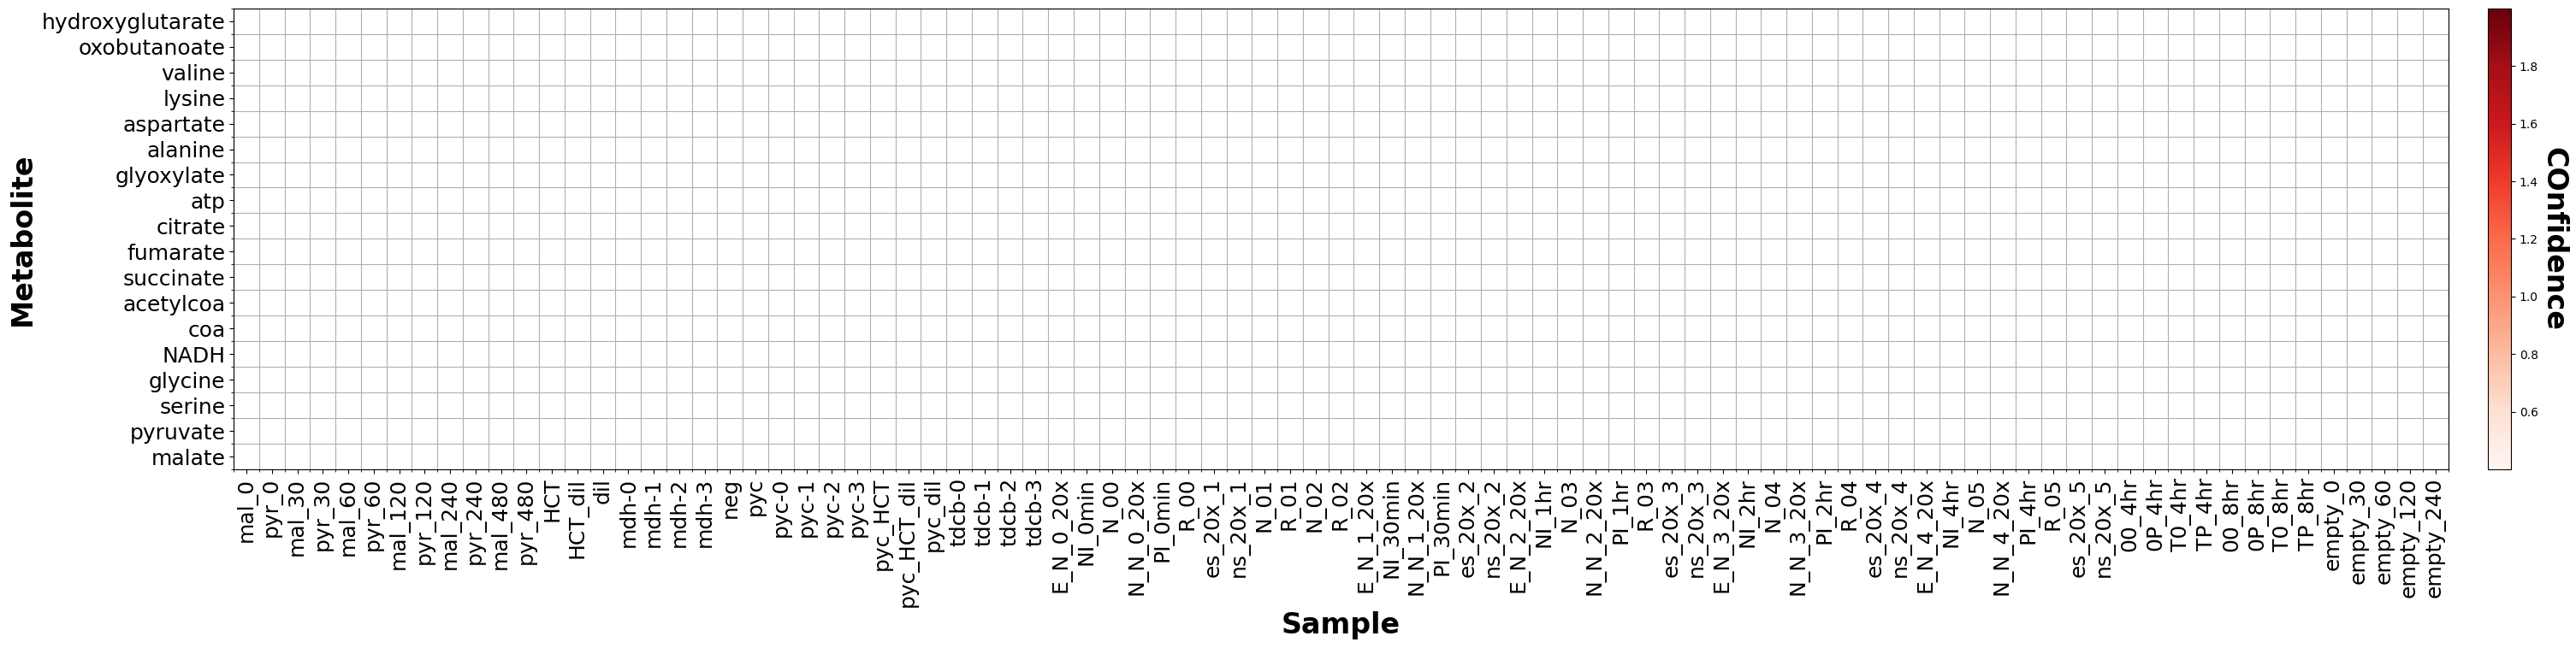

In [5]:
from matplotlib.collections import PatchCollection

def circlemap(data_df, data_weights_df, figsize=(40, 7), ignore = None):
       if ignore:
              data_df = data_df[:-ignore]
              data_weights_df = data_weights_df[:-ignore]
       N, M = data_df.T.shape
       ylabels = data_weights_df.drop(columns=['sample'],inplace=False).columns
       xlabels = data_df['sample']

       x, y = np.meshgrid(np.arange(M), np.arange(N-1))
       c = data_weights_df.drop(columns=['sample'], inplace=False).T.values
       s = np.log10(data_df.drop(columns=['sample'], inplace=False).T.values)

       fig, ax = plt.subplots(figsize=figsize)

       R = (s-s.min())/(s.max()-s.min())/2
       circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
       col = PatchCollection(circles, array=c.flatten(), cmap="Reds", edgecolors='black', linewidth=1.5)
       ax.add_collection(col)

       ax.set(xticks=np.arange(M), yticks=np.arange(N-1),
              xticklabels=xlabels, yticklabels=ylabels)
       ax.set_xticks(np.arange(M+1)-0.5, minor=True)
       ax.set_yticks(np.arange(N)-0.5, minor=True)
       ax.grid(which='minor')

       plt.xticks(rotation=90)
       plt.tick_params(axis='both', which='major', labelsize=18)

       cbar = fig.colorbar(col, pad = 0.015)
       cbar.set_label('COnfidence', rotation=270, fontsize=24, labelpad=25, fontdict={'weight': 'bold'})


       plt.xlabel('Sample', fontsize=24, fontdict={'weight': 'bold'})
       plt.ylabel('Metabolite', fontsize=24, fontdict={'weight': 'bold'})

       plt.show()
       
circlemap(data_df, data_weights_df, ignore=12)

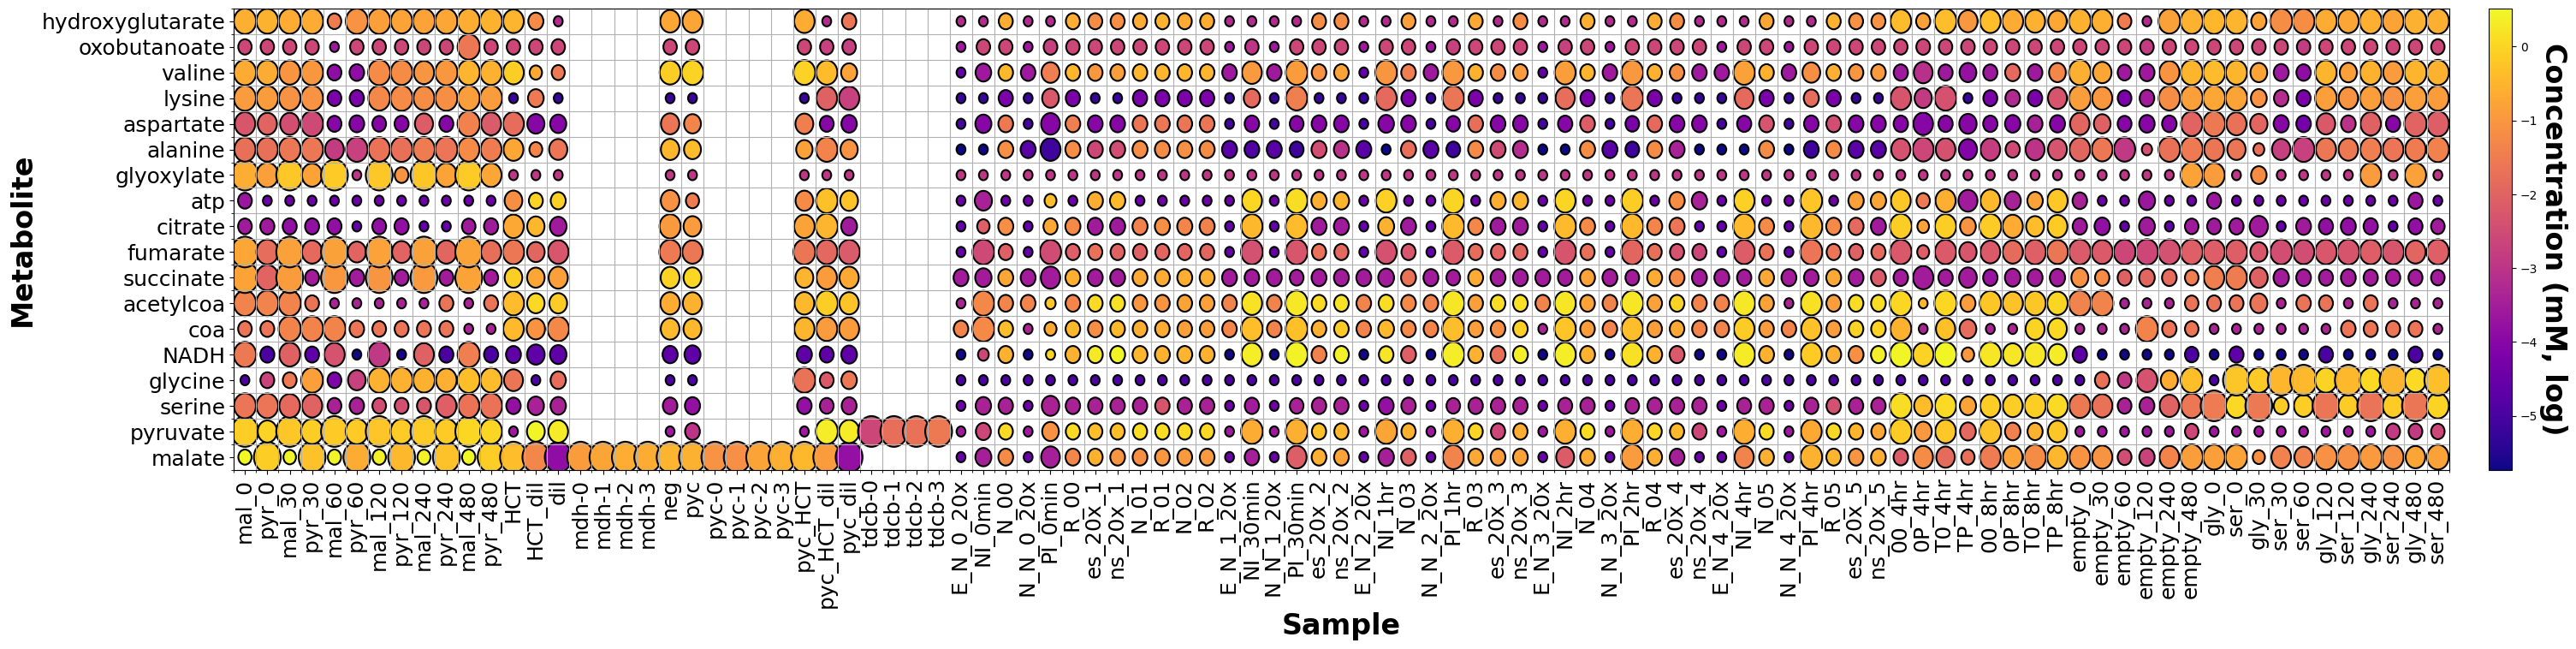

In [6]:
from matplotlib.collections import PatchCollection

def circlemap(data_df, data_weights_df, figsize=(40, 7), ignore = None, log = True, cmap = 'plasma'):
       if ignore:
              data_df = data_df[:-ignore]
              data_weights_df = data_weights_df[:-ignore]
       N, M = data_df.T.shape
       ylabels = data_weights_df.drop(columns=['sample'],inplace=False).columns
       xlabels = data_df['sample']

       x, y = np.meshgrid(np.arange(M), np.arange(N-1))
       s = data_weights_df.drop(columns=['sample'], inplace=False).T.values
       if log:
              c = np.log10(data_df.drop(columns=['sample'], inplace=False).T.values)
       else:
              c = data_df.drop(columns=['sample'], inplace=False).T.values
       fig, ax = plt.subplots(figsize=figsize)

       s[s>1]=1.2
       R = s/2
       circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
       col = PatchCollection(circles, array=c.flatten(), cmap=cmap, edgecolors='black', linewidth=1.5)
       ax.add_collection(col)

       ax.set(xticks=np.arange(M), yticks=np.arange(N-1),
              xticklabels=xlabels, yticklabels=ylabels)
       ax.set_xticks(np.arange(M+1)-0.5, minor=True)
       ax.set_yticks(np.arange(N)-0.5, minor=True)
       ax.grid(which='minor')

       plt.xticks(rotation=90)
       plt.tick_params(axis='both', which='major', labelsize=18)

       cbar = fig.colorbar(col, pad = 0.015)
       if log:
              cbar.set_label('Concentration (mM, log)', rotation=270, fontsize=24, labelpad=25, fontdict={'weight': 'bold'})
       else:
              cbar.set_label('Concentration (mM)', rotation=270, fontsize=24, labelpad=25, fontdict={'weight': 'bold'})


       plt.xlabel('Sample', fontsize=24, fontdict={'weight': 'bold'})
       plt.ylabel('Metabolite', fontsize=24, fontdict={'weight': 'bold'})

       plt.show()
       
circlemap(data_df, data_weights_df)

In [7]:
test_index_map = pd.merge(test_vars_df, test_vars_df.drop(columns=['sample','time']).drop_duplicates().reset_index(drop=False))[['sample','time','index','objective']].sort_values(['index','time'])
train_index_map = pd.merge(train_vars_df, train_vars_df.drop(columns=['sample','time']).drop_duplicates().reset_index(drop=False))[['sample','time','index','objective']].sort_values(['index','time'])

In [8]:
train_vars = [train_vars_df.drop(columns=['sample','time','objective'], inplace=False).drop_duplicates().T.to_dict()]
test_vars = [test_vars_df.drop(columns=['sample','time','objective'], inplace=False).drop_duplicates().T.to_dict()]

train_metadata = [{}]
train_metadata[0]['sample_labels'] = list(train_vars[0].keys())
train_metadata[0]['measurement_labels'] = list(data_df.columns[1:])
train_metadata[0]['timepoints'] = train_index_map.groupby('index')['time'].apply(list).to_dict()
train_metadata[0]['objective'] = train_index_map.drop_duplicates('index')['objective'].values

test_metadata = [{}]
test_metadata[0]['sample_labels'] = list(test_vars[0].keys())
test_metadata[0]['measurement_labels'] = list(data_df.columns[1:])
test_metadata[0]['timepoints'] = test_index_map.groupby('index')['time'].apply(list).to_dict()
test_metadata[0]['objective'] = test_index_map.drop_duplicates('index')['objective'].values

train_data=[{}]
train_weights=[{}]
for index, samples in train_index_map.groupby('index')['sample'].apply(list).items():
    train_data[0][index]=train_data_df.loc[train_data_df['sample'].isin(samples)].drop(columns=['sample']).values
    train_weights[0][index]=train_weights_df.loc[train_weights_df['sample'].isin(samples)].drop(columns=['sample']).values

test_data=[{}]
test_weights=[{}]
for index, samples in test_index_map.groupby('index')['sample'].apply(list).items():
    test_data[0][index]=test_data_df.loc[test_data_df['sample'].isin(samples)].drop(columns=['sample']).values
    test_weights[0][index]=test_weights_df.loc[test_weights_df['sample'].isin(samples)].drop(columns=['sample']).values


In [9]:
import tellurium as te

# load SBML model
modelfile = os.getcwd()+'/models/M3a.sbml'
r = te.loadSBMLModel(modelfile)

# get all the parameters that can vary during the fitting
kcat_labels = [p for p in r.getGlobalParameterIds() if 'Kcat_V' in p]
keq_labels = [p for p in [p for p in r.getGlobalParameterIds() if 'Keq' in p] if r[p]==1]
keq2_labels = [p for p in [p for p in r.getGlobalParameterIds() if 'Keq' in p] if r[p]!=1]
km_labels = [p for p in r.getGlobalParameterIds() if 'Km' in p]
ki_labels = [p for p in r.getGlobalParameterIds() if 'Ki' in p]
Gnc_labels = [p for p in r.getGlobalParameterIds() if 'Gnc' in p]
Gc_labels = [p for p in r.getGlobalParameterIds() if 'Gc' in p ]
kdeg_labels= [p for p in r.getGlobalParameterIds() if 'kdeg' in p]

sbml = r.getSBML()
metabolites = [s for s in r.getFloatingSpeciesIds() if 'EC' not in s]
metabolites_labels = [v for v in  [(sbml[sbml.find('<initialAssignment symbol="'+s+'">')+144+len(s):sbml.find('<initialAssignment symbol="'+s+'">')+144+len(s)+5]).split(' ')[0] for s in metabolites] if 'v' in v]
heterologous_expression = [p for p in r.getGlobalParameterIds() if 'rel' in p][1:]

# parameter_labels = kcat_labels + keq_labels + km_labels + ki_labels + Gnc_labels + Gc_labels + kdeg_labels + metabolites_labels + heterologous_expression
parameter_labels = kcat_labels + keq_labels + keq2_labels + km_labels + kdeg_labels + metabolites_labels + heterologous_expression
# parameter_labels = metabolites_labels + heterologous_expression
parameter_labels.append('rel0') # what are good bounds for this?
# parameter_labels.append('t0') 

# make upper and lower bounds
upper = np.log10(np.array(
                  [((r['Kcat_F_'+i.split('_')[-1]]*r['Kcat_R_'+i.split('_')[-1]])**0.5)*100000 for i in kcat_labels] + 
                 [100000 for i in keq_labels] +
                 [r[i]*3 for i in keq2_labels] +
                 [r[i]*100000 for i in km_labels] + 
                #  [r[i]*10000 for i in ki_labels] +
                #  [1 for _ in Gnc_labels] +
                #  [1 for _ in Gc_labels] +
                #  [r[i]*1000 for i in kdeg_labels] +
                 [100000 for _ in metabolites_labels] + 
                 [100000 for _ in heterologous_expression] +
                 [100000]))# +
                #  [150*60]))

lower = np.log10(np.array(
                [((r['Kcat_F_'+i.split('_')[-1]]*r['Kcat_R_'+i.split('_')[-1]])**0.5)/100000 for i in kcat_labels] + 
                 [1/100000 for i in keq_labels] +
                 [r[i]/3 for i in keq2_labels] +
                 [r[i]/100000 for i in km_labels] + 
                #  [r[i]/10000 for i in ki_labels] +
                #  [1/100 for _ in Gnc_labels] +
                #  [1/100 for _ in Gc_labels] +
                #  [r[i]/1000 for i in kdeg_labels] +
                 [1/100000 for _ in metabolites_labels] + 
                 [1/100000 for _ in heterologous_expression] +
                 [1/100000]))# +
                #  [1*60]))

p_initial = np.log10(np.array(
                    [((r['Kcat_F_'+i.split('_')[-1]]*r['Kcat_R_'+i.split('_')[-1]])**0.5) for i in kcat_labels] + 
                     [r[i] for i in keq_labels] +
                     [r[i] for i in keq2_labels] +
                     [r[i] for i in km_labels] + 
                    #  [r[i] for i in ki_labels] +
                    #  [0.9 for _ in Gnc_labels] +
                    #  [0.9 for _ in Gc_labels] +
                    #  [r[i] for i in kdeg_labels] +
                     [1 for _ in metabolites_labels] + 
                     [1 for _ in heterologous_expression] +
                     [1]))# +
                    #  [15*60]))

widths = np.log10(np.array(
                  [100 for _ in kcat_labels] +
                  [100 for _ in keq_labels] + 
                  [2 for i in keq2_labels] +
                  [100 for _ in km_labels] + 
                #   [10000 for _ in ki_labels] +
                #   [1 for _ in Gnc_labels] +
                #   [1 for _ in Gc_labels] +
                  # [10 for _ in kdeg_labels] +
                  [1000 for _ in metabolites_labels] + 
                  [1000 for _ in heterologous_expression] +
                  [1000]))# +
                  # [10]))
# with open('results/240829_M0/parameters.dat', 'wb') as file:
#     pops = pickle.dump([p_initial,upper,lower,widths],file)

from src.fitting.pygmo_problems import SBMLGlobalFit_Multi_Fly
train_myprob = SBMLGlobalFit_Multi_Fly(
    model = [modelfile], 
    data = train_data, 
    data_weights=train_weights,
    parameter_labels=parameter_labels, 
    lower_bounds=lower, upper_bounds=upper, 
    metadata=train_metadata,
    variables=train_vars,
    extra_residuals = [None],
    scale=True,
    log=[True]*len(parameter_labels),
    elambda=0,
    dlambda = 0,
    llambda=0,
    lelambda=0,
    ldlambda = 0,
    lllambda=0,
    elambda2=0,
    dlambda2 = 0,
    llambda2=0,
    lelambda2=1,
    ldlambda2 = 3,
    lllambda2=1,
    rmse='mean',
    objf='multi_error')

test_myprob = SBMLGlobalFit_Multi_Fly(
    model = [modelfile], 
    data = test_data, 
    data_weights=test_weights,
    parameter_labels=parameter_labels, 
    lower_bounds=lower, upper_bounds=upper, 
    metadata=test_metadata,
    variables=test_vars,
    extra_residuals = [[
                            [5,23,'C00122'],[5,23,'C00042'],[5,23,'C00048'], # fumarate, succinate, malate
                            [5,23,'C00022'], [11,23,'C00149'],[0,23,'C00065'],[17,23,'C00037'], # pyruvate, malate, serine, glycine
                            # [31,36,'C00149'],[29,36,'C00149'],[30,29,'C00149']#,[32,33,'C00149'], # HCT-neg, dil-neg, HCT_dil-dil, pycpyc_dil
                            [90,87,'C00022'],[98,95,'C00149'],[94,91,'C00149'] # tdcb, mdh, pyc
                            ]], #[[[5,23,'C00022'],[5,23,'C00122'],[5,23,'C00042'],[5,23,'C00048']]], #
    scale=True,
    log=[True]*len(parameter_labels),
    elambda=0,
    dlambda = 0,
    llambda=0,
    lelambda=0,
    ldlambda = 0,
    lllambda=0,
    elambda2=0,
    dlambda2 = 0,
    llambda2=0,
    lelambda2=1,
    ldlambda2 = 100,
    lclambda2 = 1,
    lllambda2=1,
    rmse='sum',
    objf='multi_comb',
    fitness_std = False)

# test_myprob._set_nominal_fitness([9.4e-1, 7.9e-6, 1.7e+0, 2.9e-1])
# train_myprob._set_nominal_fitness([9.4e-1, 7.9e-6, 1.7e+0, 2.9e-1])

# train_myprob._set_nominal_fitness([0.9, 0.3, 1, 0.3])
# train_myprob._set_nominal_fitness([0.9, 0.3, 1, 0.3])
test_myprob.nominal_fitness = [1,1,1,1,1,1]

# with open('results/241004_M3_spiked/241004_train_myprob.obj', 'wb') as file:
#     pickle.dump(train_myprob, file)

test_myprobs = [test_myprob]*6
train_probs = [pg.problem(p) for p in test_myprobs] # SWAPED THEM HERE FOR TESTING
test_prob = pg.problem(train_myprob)

In [329]:
import pickle
with open('results/241025_M3/pops_M3.dat', 'rb') as file:
    pops = pickle.load(file)
with open('results/241025_M3/pop_t0_M3.dat', 'rb') as file:
    pops0  = pickle.load(file)
with open('results/241025_M3/fs_M3.dat', 'rb') as file:
    f = pickle.load(file)
#
with open('results/241025_M3/test_myprobM2.obj', 'rb') as file:
    test_myprob= pickle.load(file)

test_myprob.objf ='multi_exp'
all_f = np.array([p.get_f() for p in pops]).reshape(-1,3)
all_x = np.array([p.get_x() for p in pops]).reshape(all_f.shape[0],-1)

In [30]:
import pickle
with open('results/241219_M3a/pops_multi_wkeq_2.dat', 'rb') as file:
    pops = pickle.load(file)

with open('results/241219_M3a/pops0_multi_wkeq_2.dat', 'rb') as file:
    pops0 = pickle.load(file)
    
with open('results/241219_M3a/logs_multi_wkeq_2.dat', 'rb') as file:
    logs = pickle.load(file)

with open('results/241219_M3a/fs_multi_wkeq_2.dat', 'rb') as file:
    fs = pickle.load(file)

# with open('results/241004_M3_spiked/bounds_ABR.dat', 'rb') as file:
#     all_lower,all_upper = pickle.load(file)

# with open('results/241025_M3/train_myprobM4.obj', 'rb') as file:
#     train_myprob = pickle.load(file)

# with open('results/241025_M3/test_myprobM4.obj', 'rb') as file:
#     test_myprob = pickle.load(file)

# train_myprob.set_bounds(all_upper[-1],all_lower[-1])
# test_myprob.set_bounds(all_upper[-1],all_lower[-1])

In [164]:
logs[0][0][0][2]

2.0405797571525337

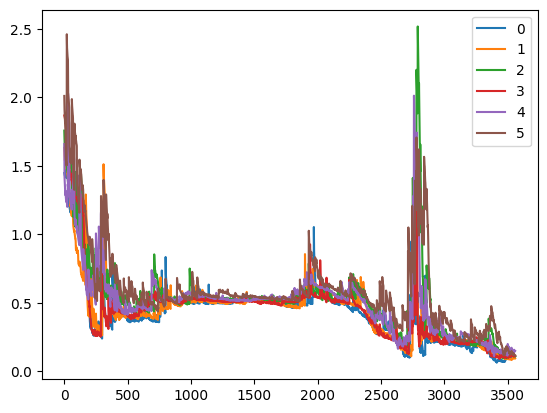

In [165]:
plt.plot(np.array([[[logs[n][p][i][2] for i in range(10)] for n in range(1,len(logs)-1) ]for p in range(6)]).reshape(6,-1).T)
plt.legend(['0','1','2','3','4','5'])

In [122]:
fs[0][0][:,0]

(300,)

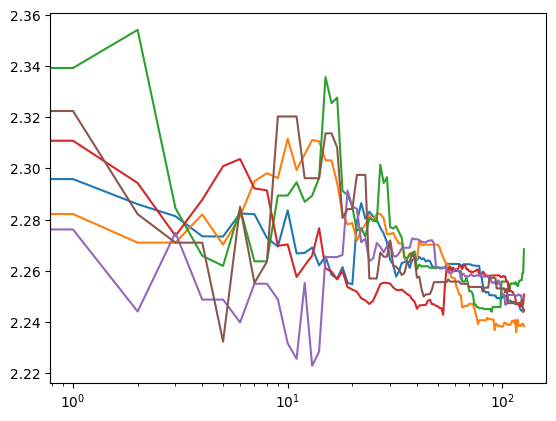

In [32]:
plt.plot(np.array([[p[:,1].min()-p[:,0].min() for p in f] for f in fs[1:]]))
plt.xscale('log')

In [33]:
all_f = np.array([p.get_f() for p in pops]).reshape(-1,test_myprob.get_nobj())
all_x = np.array([p.get_x() for p in pops]).reshape(all_f.shape[0],-1)

all_f0 = np.array([p.get_f() for p in pops0]).reshape(-1,test_myprob.get_nobj())
all_x0 = np.array([p.get_x() for p in pops0]).reshape(all_f.shape[0],-1)

In [34]:
all_f0 = np.array([f for f in fs[1]]).reshape(-1,3)

IndexError: index 3 is out of bounds for axis 0 with size 3

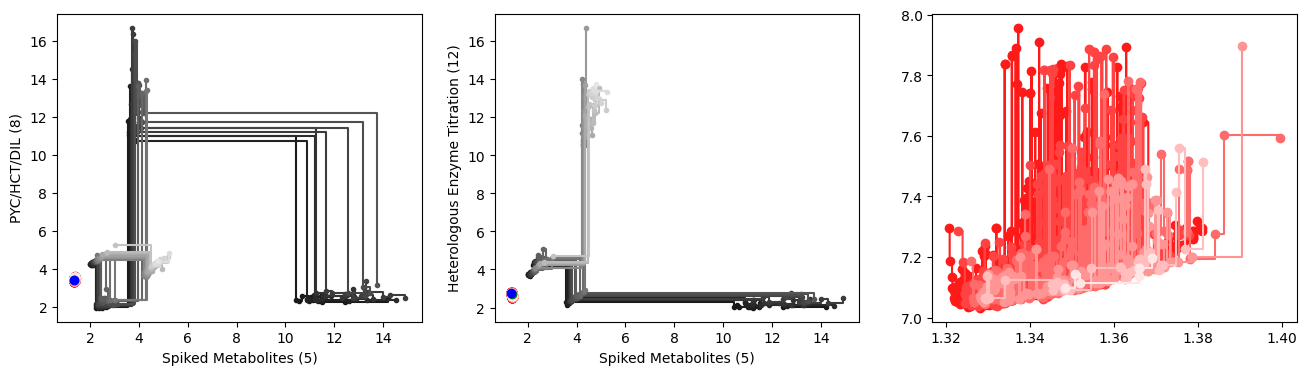

In [15]:
import pygmo as pg
f, ax = plt.subplots(1,3, figsize=(16,4))

sf0 = np.random.permutation(all_f0)[:300]
sf = np.random.permutation(all_f)
objs = [0,1]
plot_non_dominated_fronts(sf, comp = objs, axes = ax[0],marker='o', color = 'r')
plot_non_dominated_fronts(sf0, comp = objs, axes = ax[0], marker='.')
ax[0].plot(all_f[np.argmin((all_f.mean(1))), objs[0]], all_f[np.argmin((all_f.mean(1))), objs[1]], 'go', label='Mean Best')
ax[0].plot(all_f[np.argmin((all_f**2).sum(1)**0.5), objs[0]], all_f[np.argmin((all_f**2).sum(1)**0.5), objs[1]], 'bo', label='Euclidean Best')
ax[0].set_xlabel('Spiked Metabolites (5)')
ax[0].set_ylabel('PYC/HCT/DIL (8)')
# ax[0].set_xlim(1e-4,2e-3)

objs = [0,2]
plot_non_dominated_fronts(sf, comp = objs, axes = ax[1],marker='o', color = 'r')
plot_non_dominated_fronts(sf0, comp = objs, axes = ax[1], marker='.')

ax[1].plot(all_f[np.argmin((all_f.mean(1))), objs[0]], all_f[np.argmin((all_f.mean(1))), objs[1]], 'go')
ax[1].plot(all_f[np.argmin((all_f**2).sum(1)**0.5), objs[0]], all_f[np.argmin((all_f**2).sum(1)**0.5), objs[1]], 'bo')
ax[1].set_xlabel('Spiked Metabolites (5)')
ax[1].set_ylabel('Heterologous Enzyme Titration (12)')
# ax[1].set_xlim(1e-4,2e-3)

objs = [0,3]
plot_non_dominated_fronts(sf, comp = objs, axes = ax[2],marker='o', color = 'r')
plot_non_dominated_fronts(sf0, comp = objs, axes = ax[2], marker='.')

ax[2].plot(all_f[np.argmin((all_f.mean(1))), objs[0]], all_f[np.argmin((all_f.mean(1))), objs[1]], 'go', label='Mean Best')
ax[2].plot(all_f[np.argmin((all_f**2).sum(1)**0.5), objs[0]], all_f[np.argmin((all_f**2).sum(1)**0.5), objs[1]], 'bo', label='Euclidean Best')
ax[2].set_ylabel('Heterologous Enzyme Titration (12)')
ax[2].set_xlabel('PYC/HCT/DIL (8)')
ax[2].legend(bbox_to_anchor=(0.75, 1.2))


# [a.set_xscale('log') for a in ax]
# [a.set_yscale('log') for a in ax]
# [a.set_xlim([0,4]) for a in ax]
# [a.set_ylim([0,4]) for a in ax]
f.suptitle('Pareto Fronts for Objective Pairs', fontsize=16)

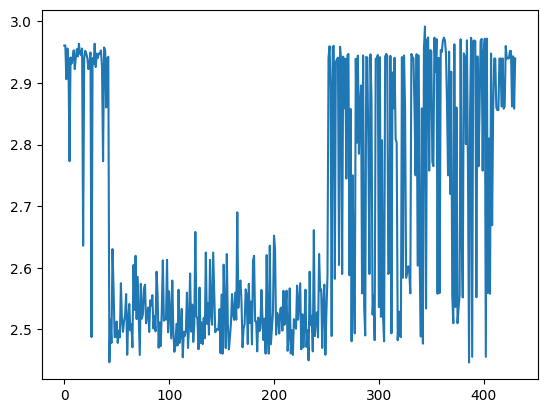

In [268]:
plt.plot(all_f[pg.fast_non_dominated_sorting(all_f)[0][0],:][:,1])

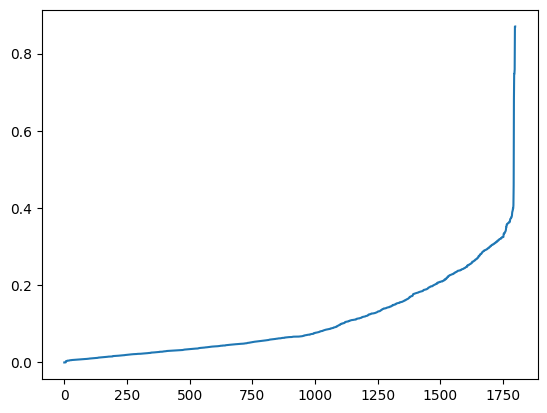

In [49]:
plt.plot(np.sort(all_f[:,1]))

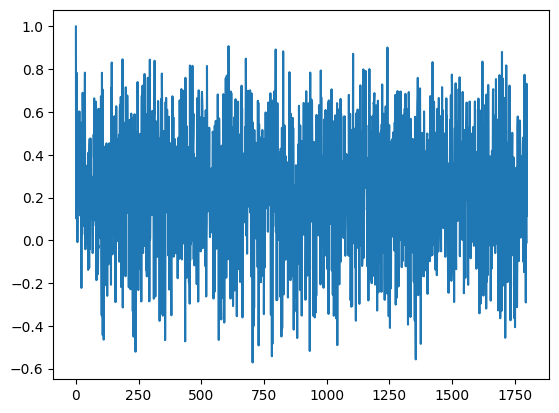

In [104]:
plt.plot(np.corrcoef(all_x0)[0])

In [229]:
np.argmin(all_f)

984

In [40]:
np.argmin(all_f[:,1])

1

In [35]:
np.argmin((all_f*2).sum(1))

966

In [25]:
all_f[0]

array([1.6180707 , 3.88898756, 3.25356854, 9.21219812, 1.913843  ])

In [45]:
test_myprob._setup_rr()
# train_myprob._setup_rr()

all_test = []
all_results = [[{s:[] for s in m['sample_labels']} for m in t.metadata] for t in [test_myprob, test_myprob]] 
for k,c in enumerate([all_x[189,:]]):
    if test_myprob.scale: x = test_myprob._unscale(c)
    if test_myprob.log: x = np.array([10**v if k else v for k,v in zip(test_myprob.log,x)])
    test_res = test_myprob._simulate(x)
    # train_res = train_myprob._simulate(10**uc)
    # [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[0], train_res, train_myprob.metadata, train_myprob.model_stuff)]
    [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[1], test_res, test_myprob.metadata, test_myprob.model_stuff)]
    all_test.append(test_res)

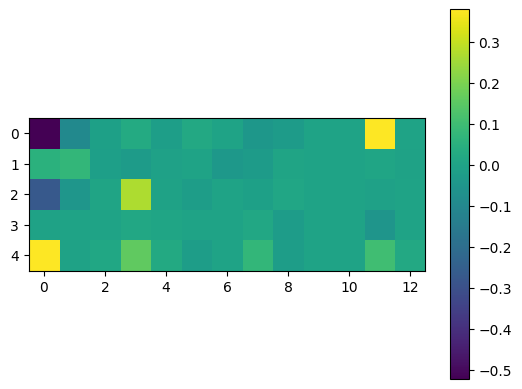

In [188]:
# test_myprob.fitness(all_x[601])
plt.imshow(test_myprob.current_d_erorr[0])
plt.colorbar()

In [177]:
for i,k in enumerate(test_myprob.model_stuff[0].data_cols.keys()):
    dcols = test_myprob.model_stuff[0].data_cols[k]
    weights = test_myprob.data_weights[0][k]

    d_error = test_myprob.current_d_erorr[i]
    cumd_error = test_myprob.current_cumd_erorr[i]
    error = test_myprob.current_error[i]
    log_error = test_myprob.current_log_erorr[i]

    wl_e = np.log1p(np.abs(error))*weights[:,dcols]
    wl_de = np.log1p(np.abs(d_error))*((weights[:,dcols]+np.roll(weights[:,dcols],1,axis=0))[:-1,:]/2)
    wl_cde = np.log1p(np.abs(cumd_error))*(((weights[:,dcols]+np.roll(weights[:,dcols],1,axis=0))[:-1,:]/2).mean(0))
    wl_le = np.log1p(np.abs(log_error))*weights[:,dcols]

    wll_e2 = np.nansum(wl_e)#/(np.nansum((~np.isnan(wl_e)))+1e-12)
    wll_de2 = np.ma.masked_invalid(wl_de).sum()#/((1-np.ma.masked_invalid(wl_de).mask).sum()+1e-12)
    wll_cde2 = np.ma.masked_invalid(wl_cde).sum()#/((1-np.ma.masked_invalid(wl_cde).mask).sum()+1e-12)
    wll_le2 = np.nansum(wl_le)#/(np.nansum((~np.isnan(wl_le)))+1e-12)

    print(test_index_map[test_index_map['index'] == k].iloc[0,0], np.round(wll_e2,2), np.round(wll_de2,2), np.round(wll_cde2,2), np.round(wll_le2,2), np.nansum([np.round(wll_e2,2), np.round(wll_de2,2), np.round(wll_cde2,2), np.round(wll_le2,2)]))

mal_0 11.52 2.89 2.08 30.66 47.150000000000006
pyr_0 5.07 2.97 2.11 23.4 33.55
mdh-0 0.14 -- -- 0.36 0.5
mdh-1 0.06 -- -- 0.13 0.19
mdh-2 0.09 -- -- 0.16 0.25
mdh-3 0.04 -- -- 0.09 0.13
pyc 0.88 -- -- 7.38 8.26
pyc-0 0.07 -- -- 0.29 0.36
pyc-1 0.09 -- -- 0.36 0.44999999999999996
pyc-2 0.07 -- -- 0.21 0.28
pyc-3 0.22 -- -- 0.49 0.71
pyc_HCT 1.42 -- -- 7.34 8.76
pyc_HCT_dil 1.77 -- -- 5.19 6.960000000000001
pyc_dil 1.58 -- -- 8.54 10.12
tdcb-0 0.15 -- -- 1.33 1.48
tdcb-1 0.22 -- -- 1.25 1.47
tdcb-2 0.24 -- -- 1.27 1.51
tdcb-3 0.24 -- -- 1.11 1.35
empty_0 1.75 0.82 0.7 23.84 27.11
gly_0 2.24 1.23 1.05 21.47 25.99
ser_0 6.2 1.86 1.55 31.54 41.15


/tmp/ipykernel_585/3878624405.py:12: RuntimeWarning:

Mean of empty slice.



In [46]:
compiled_results = {}
ms = test_myprob.model_stuff[0]
k = 0
prev_i = None
for i, s in zip(test_index_map['index'],test_index_map['sample']):
    if prev_i is not None:
        if i != prev_i:
            k = 0
    compiled_results[s] = all_test[0][0][i][:,ms.cols[i]][ms.rows[i],:][k,:]
    k = k+1
    prev_i = i
train_results_df= pd.DataFrame.from_dict(compiled_results).T.reset_index()
train_results_df.columns = ['sample', *ms.species_labels[ms.cols[i]]]

In [47]:
results_df = train_results_df

Text(0, 0.5, 'Glyoxylate (mM)')

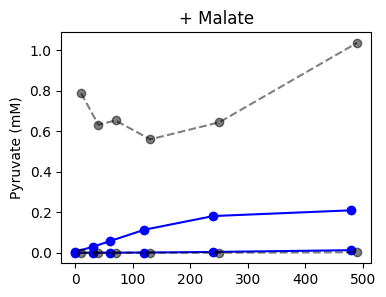

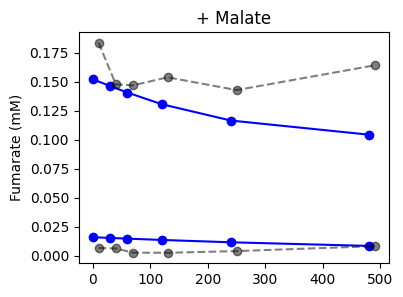

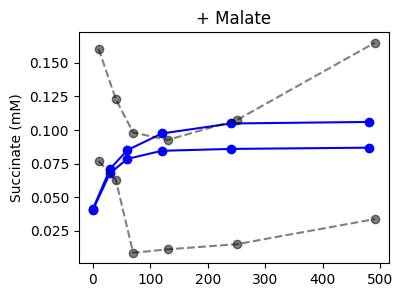

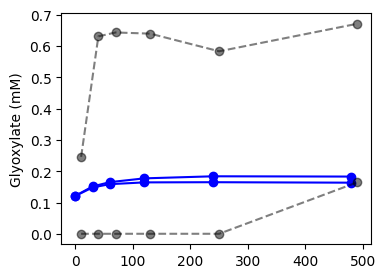

In [48]:
plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'].values, 'o--', color='k', alpha = 0.5)
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values, 'o--', color='k', alpha = 0.5)
plt.ylabel('Pyruvate (mM)')
plt.title('+ Malate')
# plt.yscale('log')

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00122'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00122'].values, 'o--', color='k', alpha = 0.5)
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00122'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00122'].values, 'o--', color='k', alpha = 0.5)
plt.ylabel('Fumarate (mM)')
plt.title('+ Malate')
# plt.yscale('log')

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00042'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00042'].values, 'o--', color='k', alpha = 0.5)
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00042'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00042'].values, 'o--', color='k', alpha = 0.5)
plt.ylabel('Succinate (mM)')
plt.title('+ Malate')
# plt.yscale('log')

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00048'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00048'].values, 'o--', color='k', alpha = 0.5)
plt.plot([0,30,60,120,240,480],results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00048'], 'bo-')
plt.plot([ 10,  40,  70, 130, 250, 490],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00048'].values, 'o--', color='k', alpha = 0.5)
plt.ylabel('Glyoxylate (mM)')

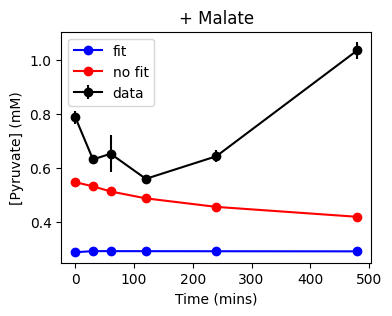

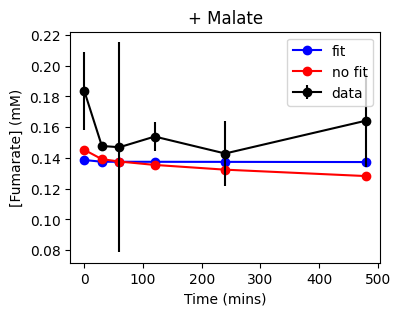

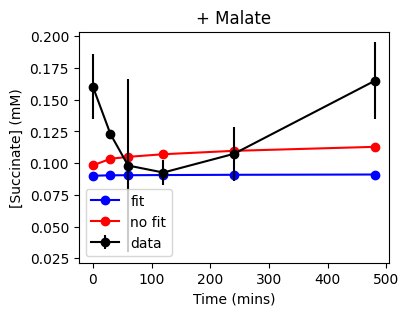

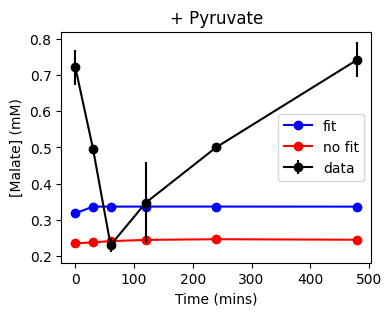

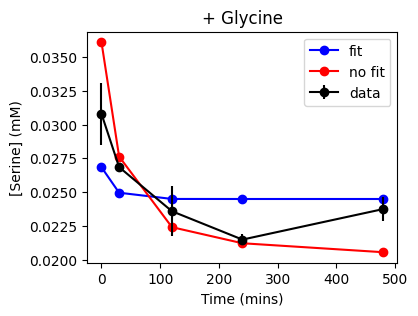

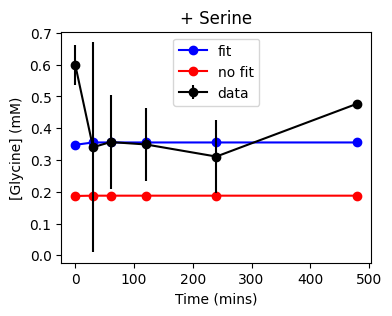

In [428]:
plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],train_results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'], 'bo-')
plt.plot([0,30,60,120,240,480],train_results_df0.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'], 'ro-')
plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'].values,
 test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'].values*2, fmt='o-', color='k')
# plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values,
#  test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values*2, fmt='o-', color='k')
plt.xlabel('Time (mins)')
plt.ylabel('[Pyruvate] (mM)')
plt.title('+ Malate')
plt.legend(['fit','no fit','data'])

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],train_results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00122'], 'bo-')
plt.plot([0,30,60,120,240,480],train_results_df0.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00122'], 'ro-')
plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00122'].values,
 test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'].values*2, fmt='o-', color='k')
# plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values,
#  test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values*2, fmt='o-', color='k')
plt.xlabel('Time (mins)')
plt.ylabel('[Fumarate] (mM)')
plt.title('+ Malate')
plt.legend(['fit','no fit','data'])

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],train_results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00042'], 'bo-')
plt.plot([0,30,60,120,240,480],train_results_df0.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00042'], 'ro-')
plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00042'].values,
 test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 5]['sample']]['C00022'].values*2, fmt='o-', color='k')
# plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values,
#  test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 23]['sample']]['C00022'].values*2, fmt='o-', color='k')

plt.xlabel('Time (mins)')
plt.ylabel('[Succinate] (mM)')
plt.title('+ Malate')
plt.legend(['fit','no fit','data'])

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],train_results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 11]['sample']]['C00149'], 'bo-')
plt.plot([0,30,60,120,240,480],train_results_df0.set_index('sample').loc[test_index_map[test_index_map['index'] == 11]['sample']]['C00149'], 'ro-')
plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 11]['sample']]['C00149'].values,
 test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 11]['sample']]['C00149'].values, fmt='o-', color='k')

plt.xlabel('Time (mins)')
plt.ylabel('[Malate] (mM)')
plt.title('+ Pyruvate')
plt.legend(['fit','no fit','data'])

plt.figure(figsize=(4,3))
plt.plot([0,30,120,240,480],train_results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 0]['sample']]['C00065'], 'bo-')
plt.plot([0,30,120,240,480],train_results_df0.set_index('sample').loc[test_index_map[test_index_map['index'] == 0]['sample']]['C00065'], 'ro-')
plt.errorbar([0,30,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 0]['sample']]['C00065'].values,
 test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 0]['sample']]['C00065'].values, fmt='o-', color='k')

plt.xlabel('Time (mins)')
plt.ylabel('[Serine] (mM)')
plt.title('+ Glycine')
plt.legend(['fit','no fit','data'])

plt.figure(figsize=(4,3))
plt.plot([0,30,60,120,240,480],train_results_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 17]['sample']]['C00037'], 'bo-')
plt.plot([0,30,60,120,240,480],train_results_df0.set_index('sample').loc[test_index_map[test_index_map['index'] == 17]['sample']]['C00037'], 'ro-')
plt.errorbar([0,30,60,120,240,480],test_data_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 17]['sample']]['C00037'].values,
 test_stds_df.set_index('sample').loc[test_index_map[test_index_map['index'] == 17]['sample']]['C00037'].values, fmt='o-', color='k')

plt.xlabel('Time (mins)')
plt.ylabel('[Glycine] (mM)')
plt.title('+ Serine')
plt.legend(['fit','no fit','data'])

In [379]:
train_results_df = train_results_df0

(0.0, 0.1)

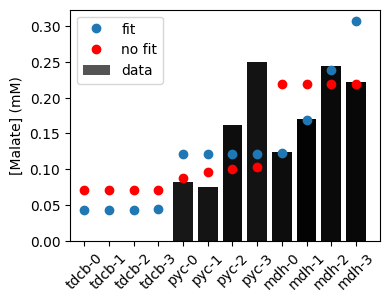

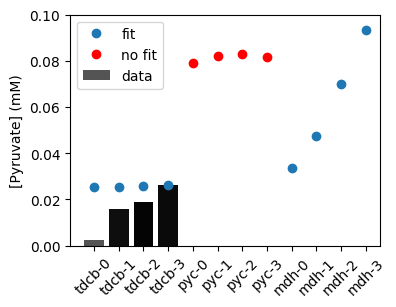

In [416]:
order = ['tdcb-0','tdcb-1','tdcb-2','tdcb-3','pyc-0','pyc-1','pyc-2','pyc-3','mdh-0','mdh-1','mdh-2','mdh-3']

plt.figure(figsize=(4,3))
ax = plt.bar(range(12), data_df.set_index('sample').loc[order]['C00149'],color='k', label='data')
for bar, alpha in zip(ax.patches, [*data_weights_df.set_index('sample').loc[order[:4]]['pyruvate'].values, *data_weights_df.set_index('sample').loc[order[4:]]['malate'].values]):
    bar.set_alpha(alpha/2)

plt.plot(range(12),train_results_df.set_index('sample').loc[order]['C00149'], 'o', label='fit')

plt.plot(range(12),train_results_df0.set_index('sample').loc[order]['C00149'], 'ro', label='no fit')

plt.xticks(range(12),order,rotation=45)
plt.legend(loc='upper left')
plt.ylabel('[Malate] (mM)')

plt.figure(figsize=(4,3))
ax = plt.bar(range(12), data_df.set_index('sample').loc[order]['C00022'],color='k', label='data')
for bar, alpha in zip(ax.patches, [*data_weights_df.set_index('sample').loc[order[:4]]['pyruvate'].values, *data_weights_df.set_index('sample').loc[order[4:]]['malate'].values]):
    bar.set_alpha(alpha/2)

plt.plot(range(12),train_results_df.set_index('sample').loc[order]['C00022'], 'o', label='fit')

plt.plot(range(12),train_results_df0.set_index('sample').loc[order]['C00022'], 'ro', label='no fit')

plt.xticks(range(12),order,rotation=45)
plt.legend()
plt.ylabel('[Pyruvate] (mM)')
plt.ylim([0,0.1])

KeyError: "None of [Index(['neg', 'pyc', 'HCT', 'pyc_HCT', 'dil', 'pyc_dil', 'HCT_dil',\n       'pyc_HCT_dil'],\n      dtype='object', name='sample')] are in the [index]"

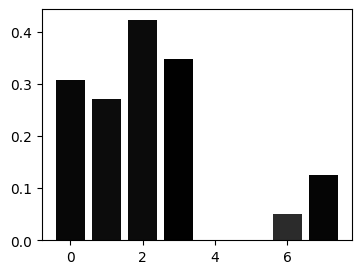

In [63]:
order = ['neg','pyc','HCT','pyc_HCT','dil','pyc_dil','HCT_dil','pyc_HCT_dil']

plt.figure(figsize=(4,3))
ax = plt.bar(range(8), data_df.set_index('sample').loc[order]['C00149'],color='k', label='data')
for bar, alpha in zip(ax.patches, [*data_weights_df.set_index('sample').loc[order[:4]]['malate'].values, *data_weights_df.set_index('sample').loc[order[4:]]['malate'].values]):
    bar.set_alpha(alpha/2)

plt.plot(range(8),train_results_df.set_index('sample').loc[order]['C00149'], 'o', label='fit')

plt.plot(range(8),train_results_df0.set_index('sample').loc[order]['C00149'], 'ro', label='no fit')

plt.xticks(range(8),order,rotation=45)
plt.legend()
plt.ylabel('[Malate] (mM)')
plt.ylim([0,0.6])

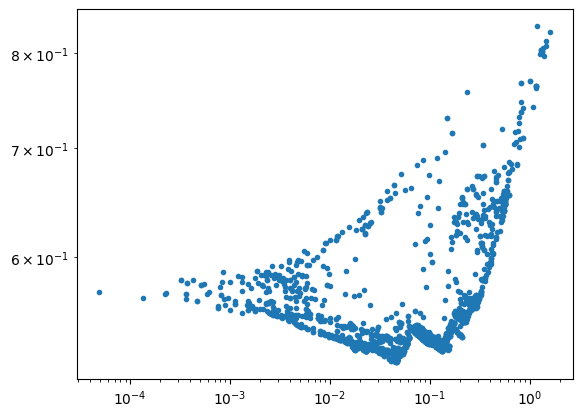

In [32]:
plt.plot(((all_f-all_f[466,:])**2).sum(1), all_f.mean(1),'.')
plt.yscale('log')
plt.xscale('log')

In [88]:
all_f[910]

array([3.16550624])

In [103]:
test_myprob._set_nominal_fitness([0.5, 0.65, 0.13, 1.3, 0.25, 1])
test_myprob.fitness(all_x0[195,:])

[2.294682038790479]

In [100]:
np.argmin(all_f0)

195

In [105]:
test_myprob.all_fitness[-2:]

[array([0.13004944, 1.00045946, 0.96528016, 0.52937448, 0.85992547,
        0.32867548]),
 array([0.39014832, 0.65029865, 0.12548642, 0.68818683, 0.21498137,
        0.22558046])]

In [129]:
exp = 5
ind = np.where([exp == i for i in test_index_map['index'].drop_duplicates().values])[0][0]
dcols = test_myprob.model_stuff[0].data_cols[exp]
# appply error function, then weights
wsq_e = (test_myprob.current_error[ind]**2)*test_myprob.data_weights[0][exp][:,dcols]
wsq_de = (test_myprob.current_d_erorr[ind]**2)*((test_myprob.data_weights[0][exp][:,dcols]*np.roll(test_myprob.data_weights[0][exp][:,dcols],1,axis=0))[:-1,:])
wsq_le = (test_myprob.current_log_erorr[ind]**2)*test_myprob.data_weights[0][exp][:,dcols]

wl_e = np.log1p(np.abs(test_myprob.current_error[ind]))*test_myprob.data_weights[0][exp][:,dcols]
wl_de = np.log1p(np.abs(test_myprob.current_d_erorr[ind]))*((test_myprob.data_weights[0][exp][:,dcols]*np.roll(test_myprob.data_weights[0][exp][:,dcols],1,axis=0))[:-1,:])
wl_le = np.log1p(np.abs(test_myprob.current_log_erorr[ind]))*test_myprob.data_weights[0][exp][:,dcols]

# avereage acrross time and apply loss function 
wll_e2 = np.nansum(wl_e)/(np.nansum((~np.isnan(wl_e)))+1e-12)
wll_de2 = np.ma.masked_invalid(wl_de).sum()/((1-np.ma.masked_invalid(wl_de).mask).sum()+1e-12)
# wll_cde2 = np.ma.masked_invalid(wl_cde).sum()/((1-np.ma.masked_invalid(wl_cde).mask).sum()+1e-12)
wll_le2 = np.nansum(wl_le)/(np.nansum((~np.isnan(wl_le)))+1e-12)


In [132]:
wl_de.shape

(5, 13)

In [155]:
wrmse_e.mean()

0.24383560708073868

In [163]:
(np.nansum(wsq_e)/(+1e-12))**0.5

4.6132961471926

78

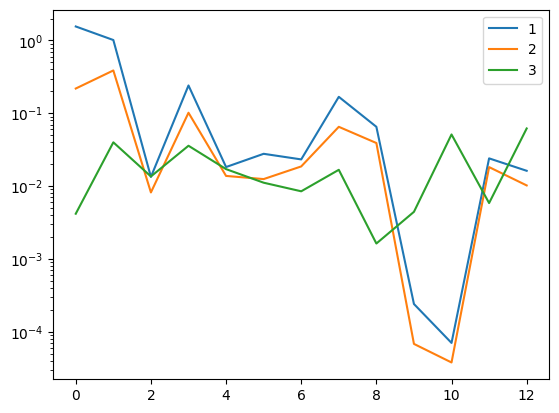

In [149]:
plt.plot(wrmse_e)
plt.plot(wrmse_de)
plt.plot(wrmse_le/100)
plt.legend(['1','2','3'])
plt.yscale('log')

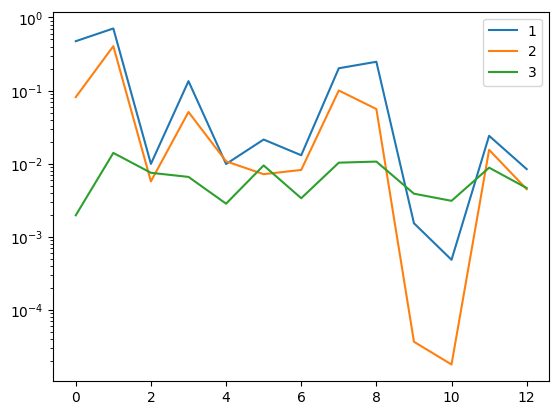

In [111]:
plt.plot(wll_e)
plt.plot(wll_de)
plt.plot(wll_le/100)
plt.legend(['1','2','3'])
plt.yscale('log')

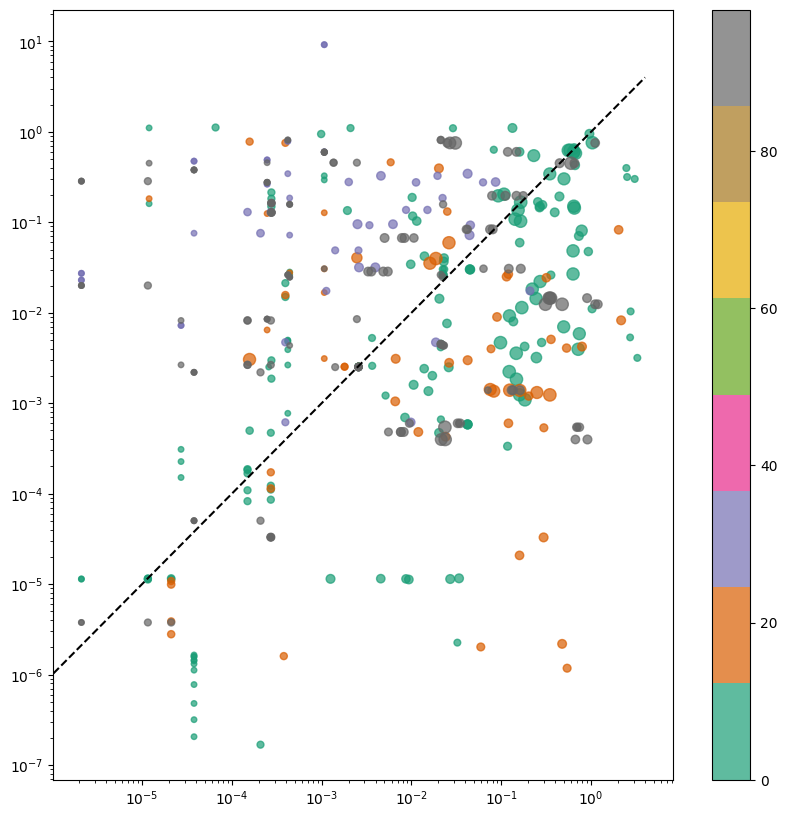

In [353]:
plt.figure(figsize=(10,10))
plt.scatter(test_data_df[train_results_df.columns].drop(columns=['sample'], inplace=False).values.flatten(), 
            train_results_df.drop(columns=['sample'], inplace=False).values.flatten(), 
            s = ((test_weights_df.drop(columns=['sample'], inplace=False).iloc[:,test_myprob.model_stuff[0].data_cols[5]].values.flatten()))*40, 
            alpha=0.7, 
            c = (test_index_map['index'].values[np.newaxis].T*np.ones((len(train_results_df),len(train_results_df.columns)-1))).flatten(), cmap = 'Dark2')

plt.plot([0,4],[0,4],'k--')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

In [363]:
len(rdf.drop(columns=['sample'], inplace=False).values.flatten())

585

In [24]:
np.tile(np.diff((test_myprob.model_stuff[0].rows[5])),(13,1)).T

array([[ 60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60],
       [ 61,  61,  61,  61,  61,  61,  61,  61,  61,  61,  61,  61,  61],
       [121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121],
       [242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242],
       [485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485]])

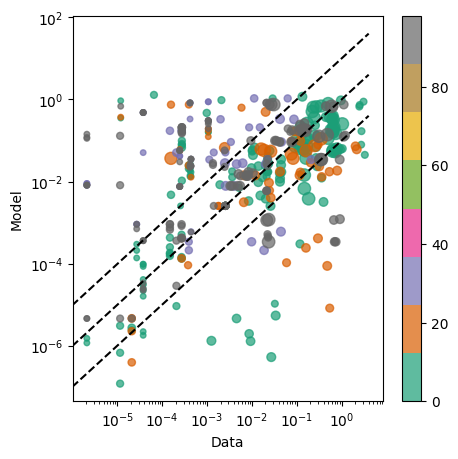

In [36]:
for rdf in [results_df]:#, results_df1, results_df2]:
    plt.figure(figsize=(5,5))
    plt.scatter(test_data_df[rdf.columns].drop(columns=['sample'], inplace=False).values.flatten(), 
                rdf.drop(columns=['sample'], inplace=False).values.flatten(), 
                s = ((test_weights_df.drop(columns=['sample'], inplace=False).iloc[:,test_myprob.model_stuff[0].data_cols[5]].values.flatten()))*40, 
                alpha=0.7, 
                c = (test_index_map['index'].values[np.newaxis].T*np.ones((len(rdf),len(rdf.columns)-1))).flatten(), cmap = 'Dark2')

    plt.xlabel('Data')
    plt.ylabel('Model')
    plt.plot([0,4],[0,4],'k--')
    plt.plot([0,4],[0,40],'k--')
    plt.plot([0,4],[0,0.40],'k--')
    plt.yscale('log')
    plt.xscale('log')
    plt.colorbar()

In [280]:
5%2

1

[[<matplotlib.lines.Line2D at 0x7f06e955f190>],

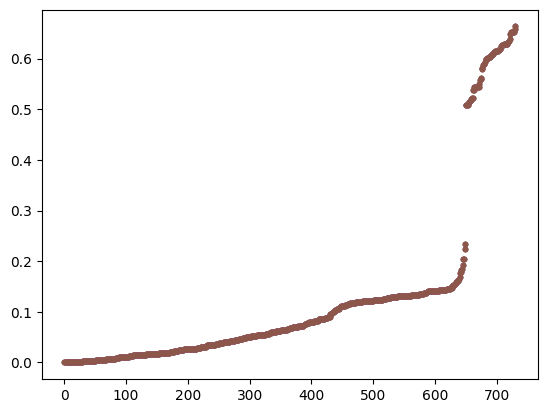

In [264]:
[plt.plot(np.sort(all_x[pg.fast_non_dominated_sorting(all_f)[0][0],-40]),'.') for p in pops]

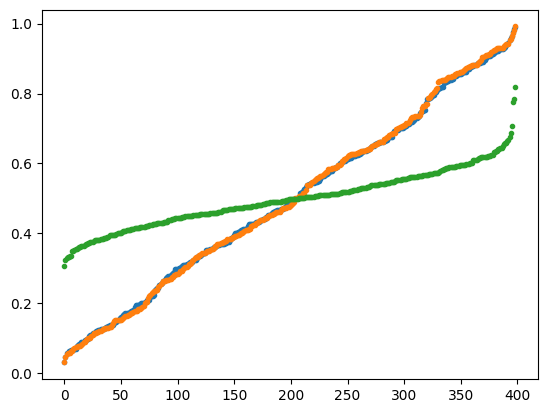

In [256]:
plt.plot(np.sort(all_x[pg.fast_non_dominated_sorting(all_f)[0][0],:].mean(0)),'.')
plt.plot(np.sort(all_x.mean(0)),'.')
plt.plot(np.sort(all_x0.mean(0)),'.')

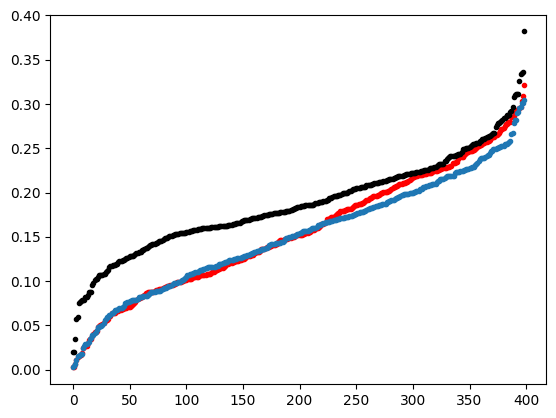

In [267]:
plt.plot(np.sort(all_x[pg.fast_non_dominated_sorting(all_f)[0][0],:600].std(0)),'r.')
plt.plot(np.sort(all_x.std(0)),'.')
plt.plot(np.sort(all_x0.std(0)),'k.')

In [35]:
test_myprob._set_nominal_fitness([0.5, 0.65, 0.13, 0.7, 0.25])
test_myprob.fitness(all_x[185])

Normalized fitness with multi_range not implemented


/mmfs1/gscratch/cheme/dalba/repos/ECFERS/src/fitting/pygmo_problems.py:625: RuntimeWarning:

Mean of empty slice.

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

divide by zero encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning:




[1.0763149199330475, 0.8391995950032447, 0.20084022928995665]

In [44]:
all_f[301,:]

array([1.19095671, 0.729567  , 0.20134942])

In [136]:
len(all_x)

1800

In [137]:
len(all_x0[0])

3311

In [63]:
np.min(np.array(fs[-1]).reshape(-1,5)[:,2])

0.08003172203219053

 ...]

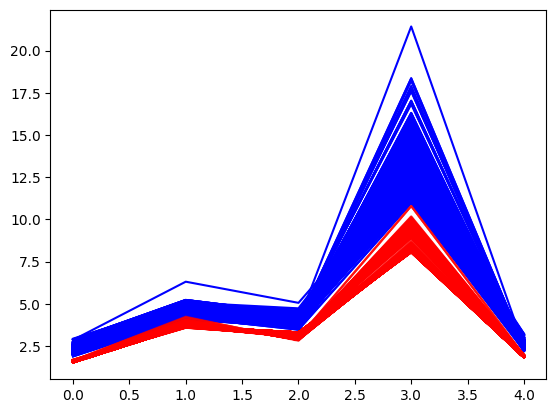

In [158]:
plt.figure()
plt.plot(np.array(fs[0]).reshape(-1,5).T,'b')
plt.plot(np.array(fs[-1]).reshape(-1,5).T,'r', alpha = 0.5)
# plt.ylim([0,2])

In [32]:
np.array(fs[0])[0,1,:]

array([13.38989305,  1.37857265,  2.63474953,  1.22054801,  5.07223328])

In [126]:
[np.nanmean([list(np.nanmean([test_myprob._residual(results, data[sample], weights[sample], sample, ms, md) for sample, results in resdict.items()],0))+[0] for data,weights,ms,resdict,md in zip(test_myprob.data,test_myprob.data_weights,test_myprob.model_stuff,test_res,test_myprob.metadata)]*2,0)]

[array([0.18197952, 0.89903241, 0.08804108, 0.5972706 , 0.        ])]

In [50]:
all_f0[300]

array([6.74529444e+00, 2.66679598e+01, 2.10357896e+11])

In [57]:
test_myprob._set_nominal_fitness([0.5, 0.65, 0.13, 0.7, 0.25])
test_myprob._setup_rr()
test_myprob.fitness(all_x[1112])

all_test = []
all_results = [[{s:[] for s in m['sample_labels']} for m in t.metadata] for t in [test_myprob, test_myprob]] 
for k,c in enumerate([all_x[1112,:]]):
    if test_myprob.scale: x = test_myprob._unscale(c)
    if test_myprob.log: x = np.array([10**v if k else v for k,v in zip(test_myprob.log,x)])
    test_res = test_myprob._simulate(x)
    # train_res = train_myprob._simulate(10**uc)
    # [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[0], train_res, train_myprob.metadata, train_myprob.model_stuff)]
    [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[1], test_res, test_myprob.metadata, test_myprob.model_stuff)]
    all_test.append(test_res)

Normalized fitness with multi_range not implemented


In [58]:
res = np.array([[test_myprob._residual(results, data[sample], weights[sample], sample, ms, md) for sample, results in resdict.items()] for data,weights,ms,resdict,md in zip(test_myprob.data,test_myprob.data_weights,test_myprob.model_stuff,test_res,test_myprob.metadata)])

In [59]:
res[0,:,0]

array([0.14523415, 0.02153128])

([<matplotlib.axis.YTick at 0x7f7ddfaf2460>,
 [Text(0, 0, 'mal_0'), Text(0, 1, 'empty_0')])

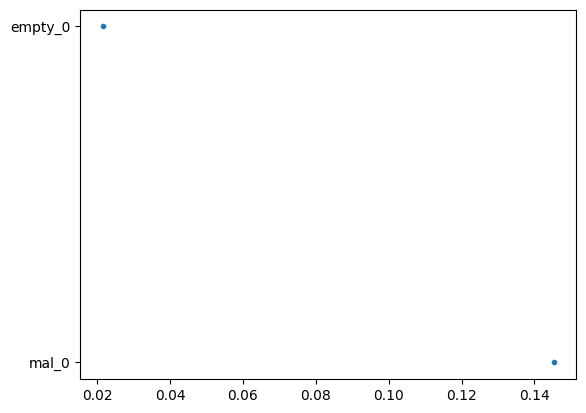

In [61]:
# plt.plot(res0[0,:,0], range(25),'k.')
plt.plot(res[0,:,0], range(2),'.')
# plt.plot([0,25],[np.nanmean(res[0,:,0])]*2)
# plt.plot([0,25],[np.nanmean(res[0,:,0])+np.nanstd(res[0,:,0])]*2)
plt.yticks(range(2),test_index_map.drop_duplicates('index').set_index('index').loc[test_myprob.metadata[0]['sample_labels']]['sample'].values)

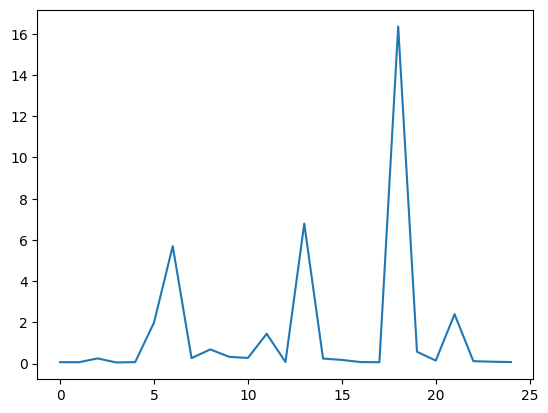

In [100]:
plt.plot((res0[0,:,0]/res[0,:,0])/17)

In [173]:
np.ptp(res[0,:,:],0)

array([0.18024495,        nan,        nan, 0.67349351])

In [163]:
np.array(fs)/np.array(fm)

array([[0.82831968, 0.14335956, 0.46823798, 0.72336194, 1.        ]])

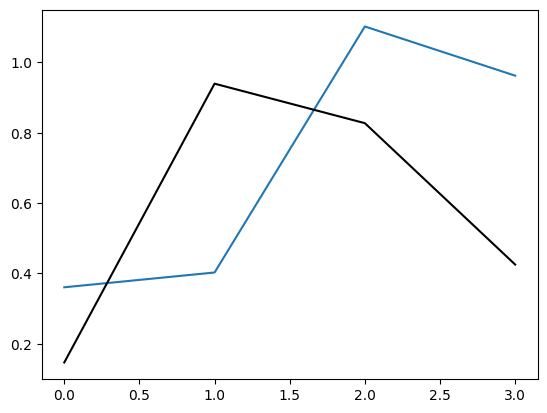

In [215]:
plt.plot((np.nanmax(res[0,:,:],0)-np.nanmin(res[0,:,:],0))/np.array([0.5, 0.65, 0.13, 0.7]),)
plt.plot(np.nanmean(res[0,:,:],0)/np.array([0.5, 0.65, 0.13, 0.7]),'k')

In [221]:
all_residuals = [[test_myprob._residual(results, data[sample], weights[sample], sample, ms, md) for sample, results in resdict.items()] for data,weights,ms,resdict,md in zip(test_myprob.data,test_myprob.data_weights,test_myprob.model_stuff,test_res,test_myprob.metadata)]
# extra_res = test_myprob._extra_residual(res[0],test_myprob.data[0],test_myprob.data_weights[0],test_myprob.model_stuff[0])
[*list(np.nanmean(all_residuals, (0,1))), *list(np.nanmax(all_residuals, (0,1))-np.nanmin(all_residuals, (0,1))), 3]


/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning:




[0.07335205722461452,
 0.610629257988087,
 0.10751980817555204,
 0.2976051625184058,
 0.18024495330159437,
 0.261645400477136,
 0.14326074355849183,
 0.6734935063841223,
 3]

/tmp/ipykernel_585/2964352299.py:1: UserWarning:




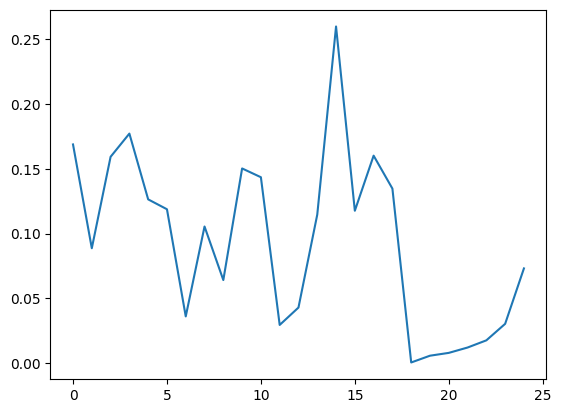

In [150]:
plt.plot(np.array(resi)[:,0])

In [216]:
all_res = []
for data,weights,ms,resdict,md in zip(test_myprob.data,test_myprob.data_weights,test_myprob.model_stuff,test_res,test_myprob.metadata):
    er = test_myprob._extra_residual(resdict,data,weights,ms)
    res = []
    for sample, results in resdict.items():
        res.append(test_myprob._residual(results, data[sample], weights[sample], sample, ms, md))
    mean_res = np.nanmean(res,0)
    range_res = np.nanmax(res,0)-np.nanmin(res,0)
    all_res.append(list(mean_res+range_res+er)+[er])
np.nansum(all_res,0) 

/mmfs1/gscratch/cheme/dalba/repos/ECFERS/src/fitting/pygmo_problems.py:581: RuntimeWarning:

divide by zero encountered in divide

/mmfs1/gscratch/cheme/dalba/repos/ECFERS/src/fitting/pygmo_problems.py:581: RuntimeWarning:

invalid value encountered in divide

/mmfs1/gscratch/cheme/dalba/repos/ECFERS/src/fitting/pygmo_problems.py:597: RuntimeWarning:

Mean of empty slice.

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

divide by zero encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning:




array([0.44910364, 1.06778129, 0.44628718, 1.1666053 , 0.19550663])

In [91]:
1.37763622*0.3

0.41329086600000003

In [104]:
test_myprob._set_nominal_fitness([1, 1, 1, 1, 1])

In [112]:
test_myprob.fitness(all_x[549,:])

/mmfs1/gscratch/cheme/dalba/repos/ECFERS/src/fitting/pygmo_problems.py:576: RuntimeWarning:

invalid value encountered in log10

/mmfs1/gscratch/cheme/dalba/repos/ECFERS/src/fitting/pygmo_problems.py:590: RuntimeWarning:

Mean of empty slice.

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

divide by zero encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning:




ValueError: Nominal fitness not set

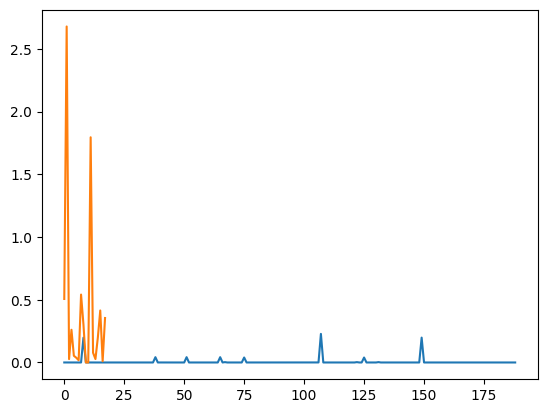

In [175]:
plt.plot(np.abs(np.diff(test_res[0][5],axis=0)).sum(0))
plt.plot(np.abs(np.diff(test_myprob.data[0][5],axis=0)).sum(0)*((test_myprob.data_weights[0][5]*np.roll(test_myprob.data_weights[0][5],1,axis=0))[:-1,:]).mean(0))

In [106]:
np.log1p(np.abs(np.diff(test_myprob.data[0][98],axis=0)).sum(0))*((test_myprob.data_weights[0][98]*np.roll(test_myprob.data_weights[0][98],1,axis=0))[:-1,:]).mean(0))

SyntaxError: unmatched ')' (1405740589.py, line 1)

In [191]:
((test_myprob.data_weights[0][5]+np.roll(test_myprob.data_weights[0][5],1,axis=0))[:-1,:])

array([[1.1900631 , 3.60545964, 1.92711873, 1.39832937, 1.9907342 ,
        1.01149572, 1.39994548, 3.92509081, 3.99646518, 1.22561644,
        1.01951874, 3.36107129, 1.90547784, 1.91367526, 1.97335203,
        1.98736396, 1.59410064, 1.99391002],
       [1.15600929, 3.5440109 , 1.90707422, 1.01803201, 1.93222667,
        1.60388157, 1.99948277, 3.92592621, 3.98372151, 1.24642342,
        1.01951874, 3.32226277, 1.91835528, 1.77514343, 1.94686186,
        1.94445921, 1.20125968, 1.97545737],
       [1.15576499, 3.88518193, 1.54694117, 1.23701316, 1.8521874 ,
        1.9889271 , 1.39982305, 3.98978814, 3.98429832, 1.26190873,
        0.80028577, 3.87648573, 1.80863905, 1.48473184, 1.57819295,
        1.56795768, 1.00109069, 1.59080709],
       [1.18960667, 3.9402551 , 1.23107165, 1.60295794, 1.90897385,
        1.60943209, 0.80028577, 3.92769553, 3.99859437, 1.2508775 ,
        0.80028577, 3.8366177 , 1.80230215, 1.24157896, 1.58697187,
        1.61164317, 1.00056878, 1.60940736],
    

In [113]:
test_res[0][5].shape

(1000, 189)

In [125]:
rrr = []
for i in test_myprob.data[0].keys():
    fit = test_res[0][i][:,ms.cols[i]][ms.rows[i],:]
    cumd = np.sum(np.abs(np.diff(test_myprob.data[0][i][:,ms.data_cols[i]],axis=0)),axis=0)
    cumf = np.sum(np.abs(np.diff(fit,axis=0)),axis=0)
    cumd_error =1-cumf/cumd
    w = (np.abs(cumd_error))*(((test_myprob.data_weights[0][i][:,ms.data_cols[i]]+np.roll(test_myprob.data_weights[0][i][:,ms.data_cols[i]],1,axis=0))[:-1,:]/2).mean(0))
    r = np.ma.masked_invalid(w).sum()/((1-np.ma.masked_invalid(w).mask).sum()+1e-12)
    rrr.append(r)
    print(i,r)
np.nanmean(rrr)

0 0.7002221315973299
5 0.9919628041878688
11 0.6708926075541134
17 0.7457632202528817
23 0.5838146147773742
29 --
30 --
31 --
32 --
33 --
34 --
35 --
36 --
87 --
88 --
89 --
90 --
91 --
92 --
93 --
94 --
95 --
96 --
97 --
98 --


/tmp/ipykernel_585/3673212816.py:6: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_585/3673212816.py:6: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_585/3673212816.py:7: RuntimeWarning:

Mean of empty slice.

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

divide by zero encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning:




0.7385310756739136

In [118]:
cumd_error.shape

(13,)

In [126]:
np.nanstd(rrr)

/mmfs1/home/dalba/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning:




0.1373023421293232

[]

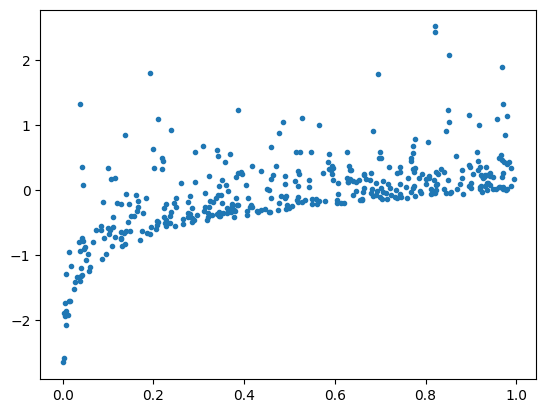

In [52]:
plt.plot(all_x[1112],np.log10(all_x[1112]/all_x0[1112]),'.')
plt.plot()

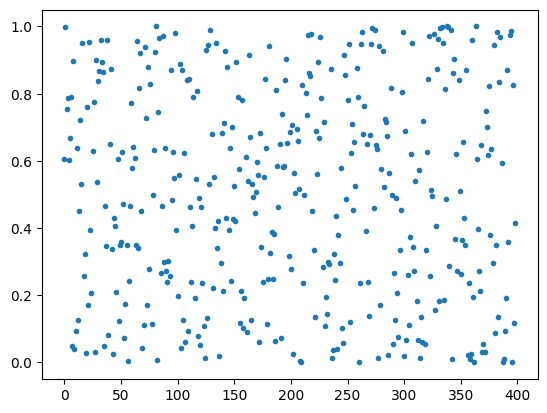

In [162]:
plt.plot(all_x[900],'.')

In [168]:
np.array(parameter_labels)[all_x[3] < 0.01]

array(['Kcat_V_R197', 'Km_C00002_eEC6211', 'Km_C00527_eEC1242',
       'Km_C00003_eEC1242', 'Km_C00002_eEC6215', 'v440', 'v466', 'v707',
       'v712', 'rel2'], dtype='<U18')

In [169]:
np.array(parameter_labels)[all_x[3] < 0.01]

array(['Kcat_V_R271', 'Km_C00002_eEC6211', 'Km_C00004_eEC11137',
       'Km_C00527_eEC1242', 'Km_C00206_eEC27140', 'Km_C00003_hEC11719',
       'Km_C00149_hEC11137', 'Km_C00037_eEC6323', 'v503', 'v734'],
      dtype='<U18')

In [202]:
 pg.sort_population_mo(all_f)[:10]

array([ 515, 1187,    3,  900,  902, 1382,  601,  393,  668, 1124],
      dtype=uint64)

In [192]:
all_f[515]

array([1.67355846, 3.65860012, 3.1362086 , 8.87064601, 1.97842949])

In [207]:
all_f[1382]

array([1.52346145, 3.65103514, 3.30120974, 8.13317376, 1.82281792])

In [371]:
allK=[]
for i in range(1800):
    k = 0
    for j in range(4):
        k += np.where(i == np.argsort(all_f[:,j]))[0][0]
    allK.append(k)

In [372]:
np.argsort(allK)[:20]

array([ 961,  989, 1177, 1050, 1162, 1487,  969, 1475,  939, 1448, 1067,
       1019, 1462, 1293,  569, 1103,  473,  327,  914,  314])

In [373]:
all_f[961]

array([1.3260799 , 3.3599067 , 2.56987011, 8.37276217, 1.58150495])

In [232]:
all_f[355]

array([1.58583338, 3.89765233, 3.03517147, 8.38904037, 1.88559672])

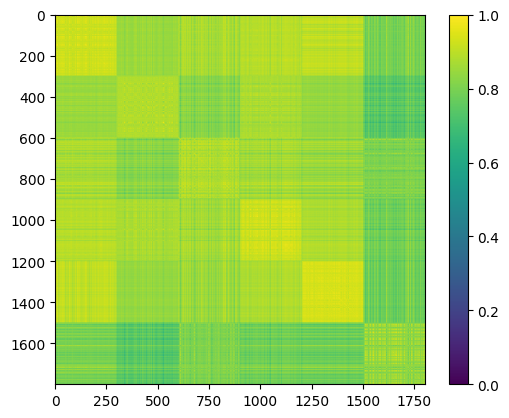

In [388]:
plt.imshow(np.corrcoef(all_x), vmin=0, vmax=1)
plt.colorbar()